<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL11 – MetodeDeteksiObjek: TemplateMatching,Edge Detection,CornerDetection,GridDetection,ContourDetection**

Nama          : Rizqi Rohmatul Huda

Kelas         : TI-3C

Nomor Absen   : 21

NIM           : 2141720264

In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.


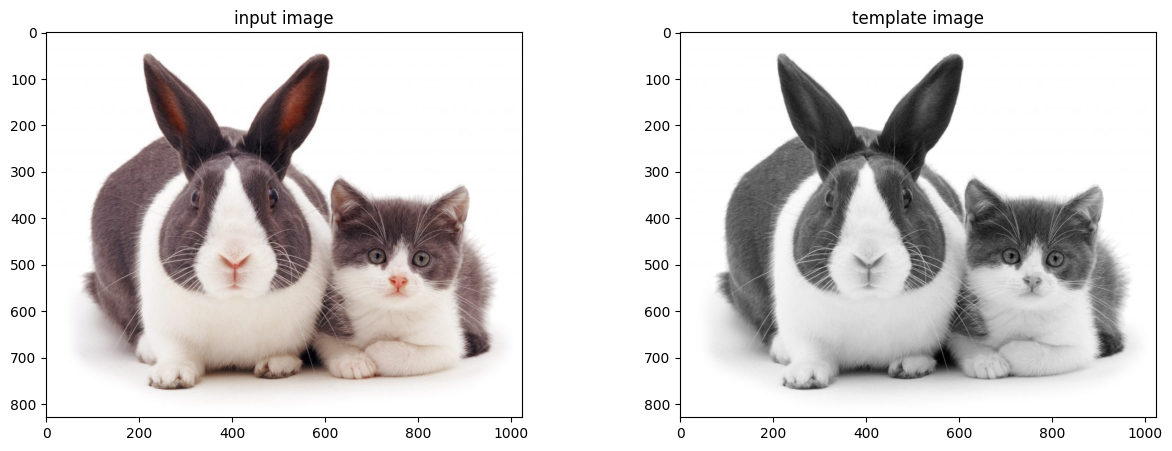

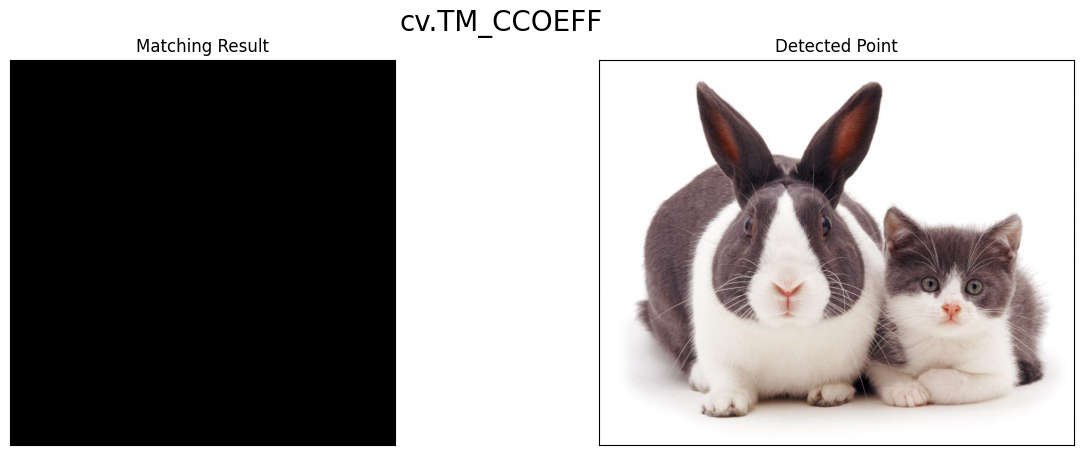

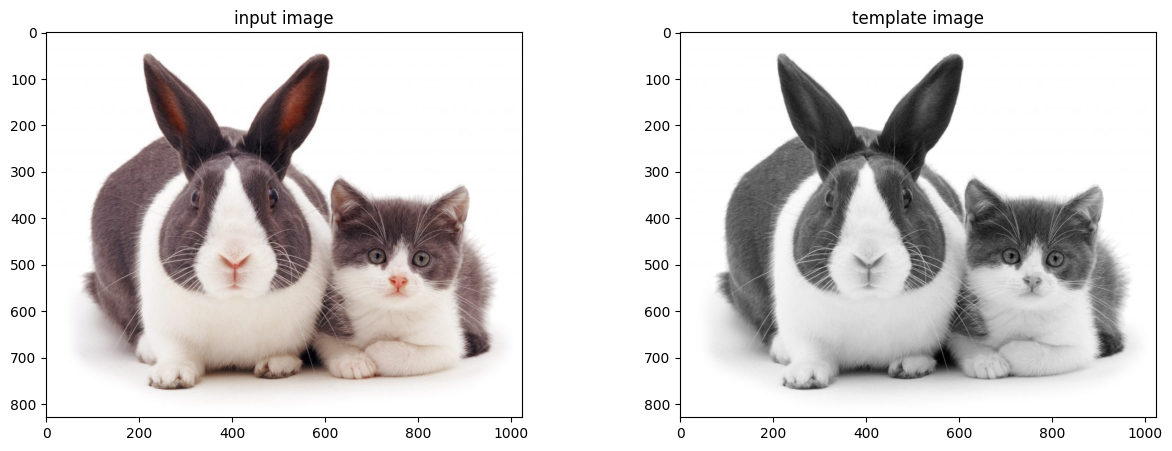

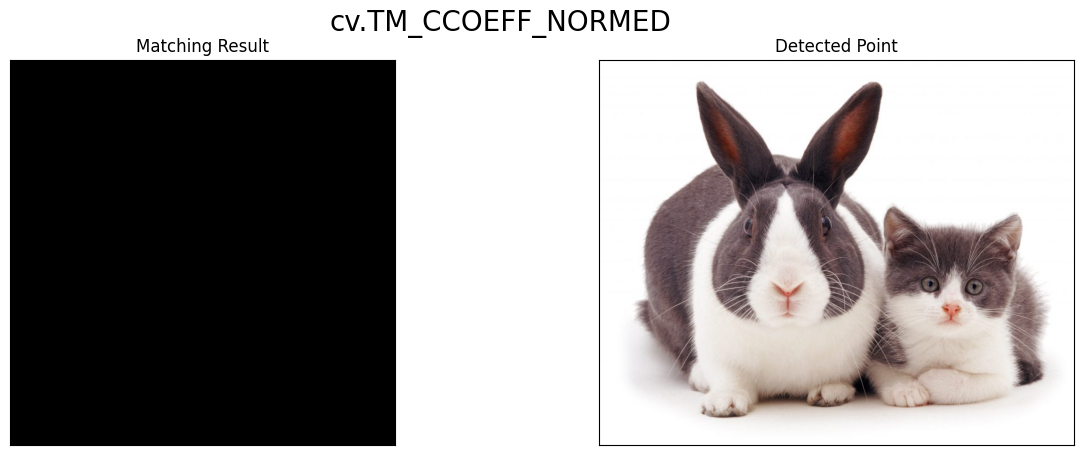

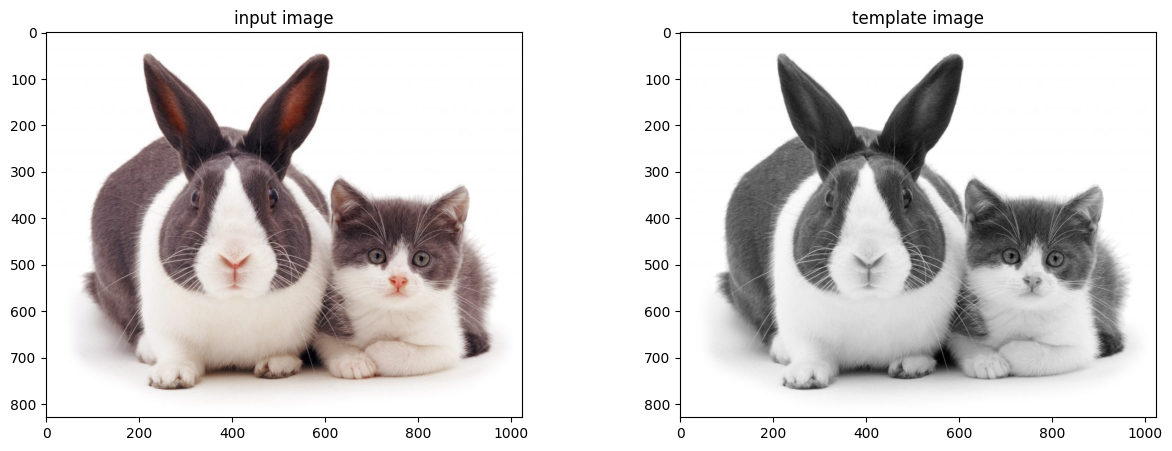

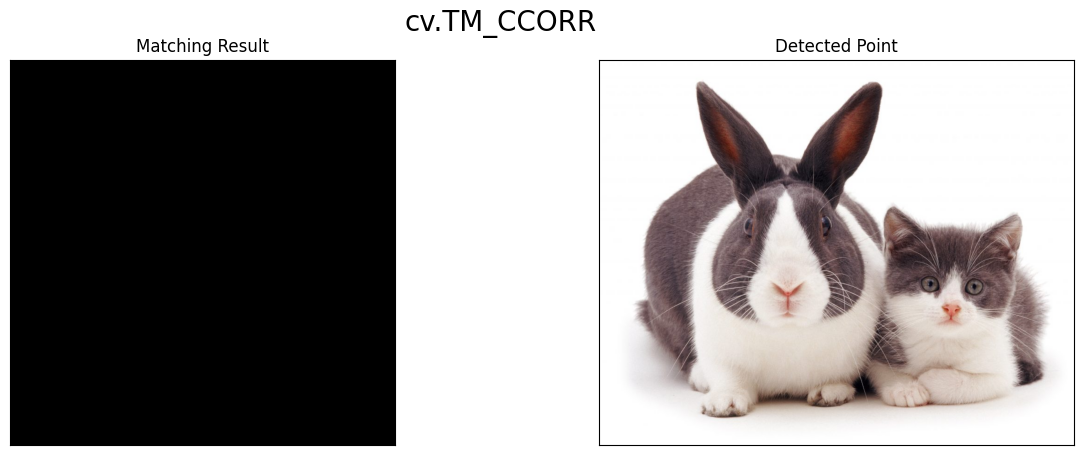

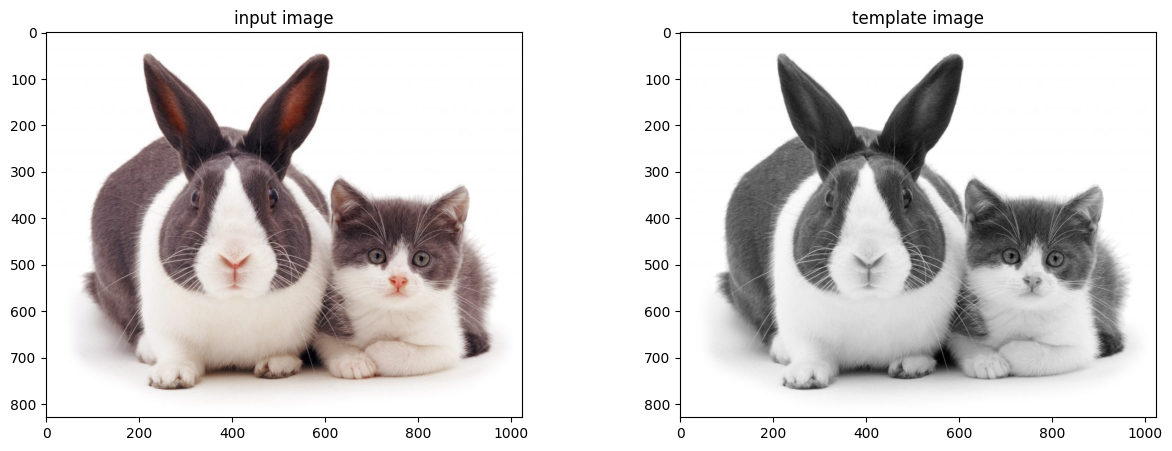

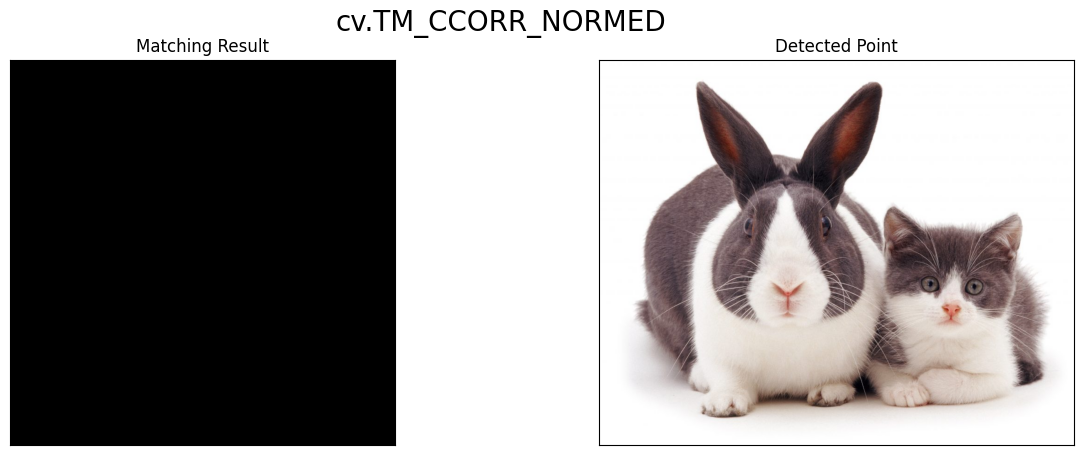

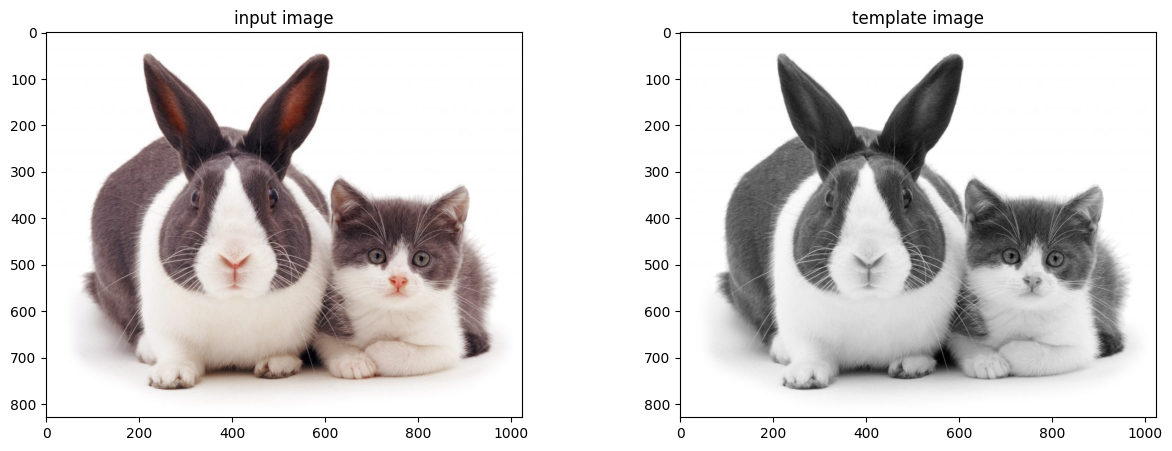

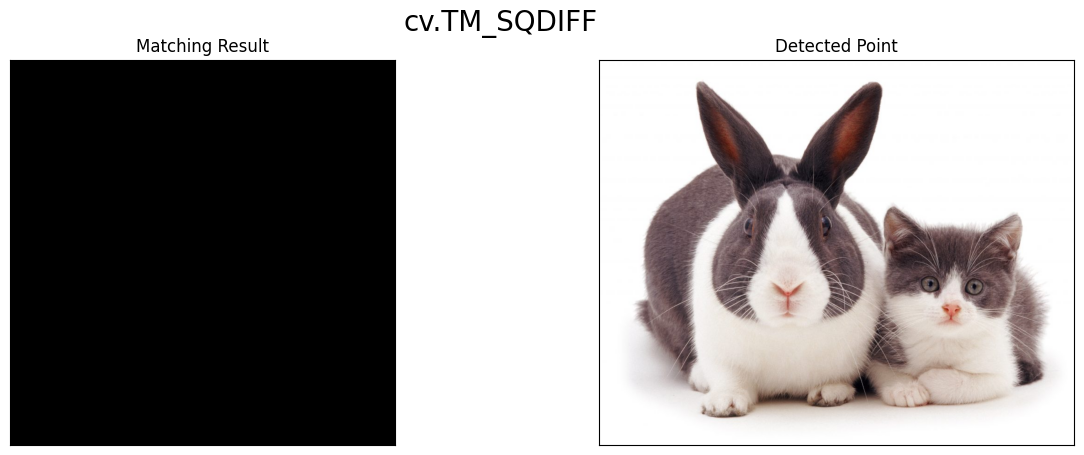

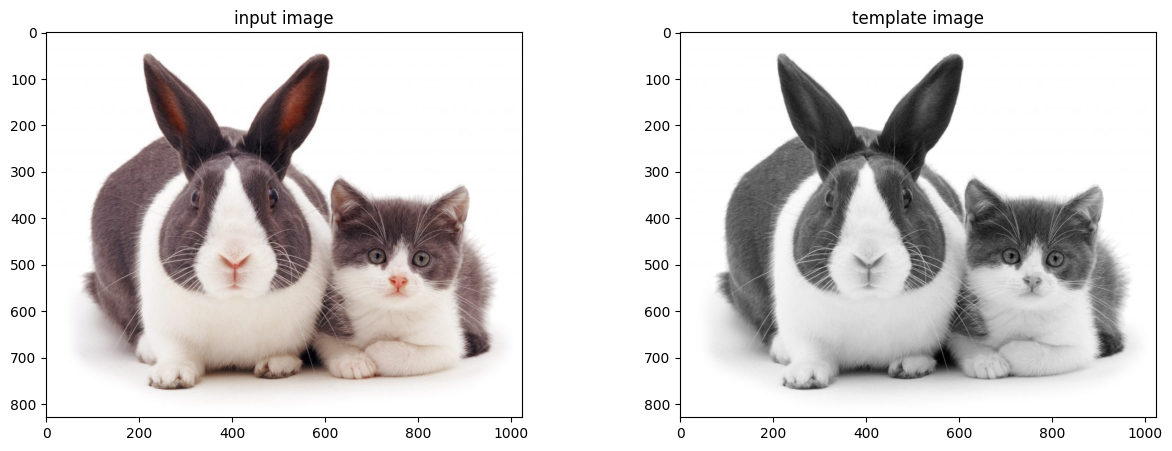

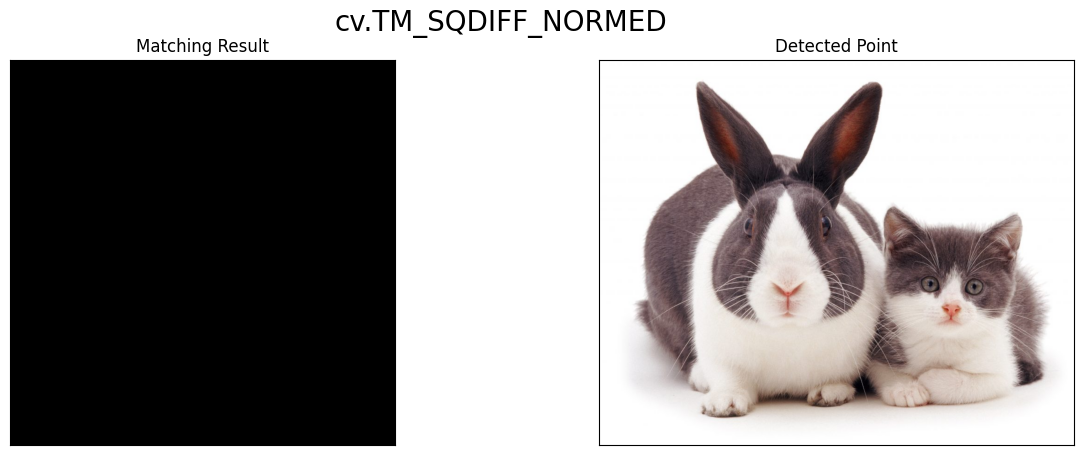

In [3]:
def template_matching(img, template, method):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_copy = img.copy()
    w, h = template.shape[::-1]

     # print input image dan template
    f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
    axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
    axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)


    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255))

    return img_copy, res

img = cv.imread('/content/drive/MyDrive/img_python/content/animal/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/img_python/content/animal/cats_and_bunnies.jpg', 0)

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method_str in methods:
    method = eval(method_str)
    result_img, result_res = template_matching(img, template, method)

    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(result_res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method_str, fontsize=20)
    plt.show()